# AI Feynman 2.0: Learning Regression Equations From Data

### Clone repository and install dependencies

In [1]:
!git clone https://github.com/SJ001/AI-Feynman.git
!cd /content/AI-Feynman && git reset --hard 28edde1a36a166a081de84999ab4fd40071957db

Cloning into 'AI-Feynman'...
remote: Enumerating objects: 633, done.
remote: Counting objects: 100% (140/140), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 633 (delta 88), reused 121 (delta 80), pack-reused 493
Receiving objects: 100% (633/633), 31.40 MiB | 15.78 MiB/s, done.
Resolving deltas: 100% (395/395), done.
HEAD is now at 28edde1 Add files via upload


Look at what we downloaded

In [2]:
!ls /content/AI-Feynman
# %pycat AI-Feynman/requirements.txt if you need to fix the dependencies

Code  example_data  LICENSE  README.md	requirements.txt


Fix broken requirements file (may not be needed if later versions fix this).

In [3]:
%%writefile AI-Feynman/requirements.txt
torch>=1.4.0
matplotlib
sympy==1.4
pandas
scipy
sortedcontainers

Overwriting AI-Feynman/requirements.txt


Install dependencies not already installed in Google Collab

In [4]:
!pip install -r AI-Feynman/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 15.0 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.11.1
    Uninstalling sympy-1.11.1:
      Successfully uninstalled sympy-1.11.1


Check that fortran is installed

In [5]:
!gfortran --version

GNU Fortran (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



Check the OS version

In [6]:
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 20.04.5 LTS
Release:	20.04
Codename:	focal


Install the csh shell

In [7]:
!sudo apt-get install csh

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  csh
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 243 kB of archives.
After this operation, 367 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 csh amd64 20110502-5 [243 kB]
Fetched 243 kB in 0s (2,707 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package csh.
(Reading database ... 122349 files and directories currently installed

Set loose permissions to avoid some reported file permissions issues

In [8]:
!chmod +777 /content/AI-Feynman/Code/*

### Compile the fortran code

Look at the code directory

In [9]:
!ls -l /content/AI-Feynman/Code

total 1244
-rwxrwxrwx 1 root root     11 Apr 13 10:56 10ops.txt
-rwxrwxrwx 1 root root     15 Apr 13 10:56 14ops.txt
-rwxrwxrwx 1 root root     19 Apr 13 10:56 19ops.txt
-rwxrwxrwx 1 root root      8 Apr 13 10:56 7ops.txt
-rwxrwxrwx 1 root root    138 Apr 13 10:56 ai_feynman_example.py
-rwxrwxrwx 1 root root   1287 Apr 13 10:56 ai_feynman_terminal_example.py
-rwxrwxrwx 1 root root 960508 Apr 13 10:56 arity2templates.txt
-rwxrwxrwx 1 root root    653 Apr 13 10:56 brute_force_oneFile_mdl_v2.scr
-rwxrwxrwx 1 root root    654 Apr 13 10:56 brute_force_oneFile_mdl_v3.scr
-rwxrwxrwx 1 root root    541 Apr 13 10:56 brute_force_oneFile_v1.scr
-rwxrwxrwx 1 root root    608 Apr 13 10:56 brute_force_oneFile_v2.scr
-rwxrwxrwx 1 root root    609 Apr 13 10:56 brute_force_oneFile_v3.scr
-rwxrwxrwx 1 root root    616 Apr 13 10:56 compile.sh
-rwxrwxrwx 1 root root   4444 Apr 13 10:56 dimensionalAnalysis.py
-rwxrwxrwx 1 root root   6168 Apr 13 10:56 get_pareto.py
-rwxrwxrwx 1 root root   1745 Apr 13 10:5

Compile .f files into .x files

In [10]:
!cd /content/AI-Feynman/Code/ && ./compile.sh

### Run the first example from the AI-Feynman repository

Change working directory to the Code directory

In [11]:
import os
os.chdir("/content/AI-Feynman/Code/")
print(os.getcwd())

/content/AI-Feynman/Code


In [12]:
!pwd

/content/AI-Feynman/Code


Check that the bruteforce code runs without errors

In [ ]:
from S_brute_force import brute_force
brute_force("/content/AI-Feynman/example_data/","example1.txt",30,"14ops.txt")

Look at the first line of the example 1 file

In [14]:
!head -n 1 /content/AI-Feynman/example_data/example1.txt

1.6821347439986711 1.1786188905177983 4.749225735259924 1.3238356535004034 3.462199507094163 


In [15]:
# Example 1 has data generated from an equation, where the last column is the regression target, and the rest of the columns are the input data
# The following example shows the relationship between the first line of the file example1.txt and the formula used to make the data
x=[1.6821347439986711,1.1786188905177983,4.749225735259924,1.3238356535004034,3.462199507094163]
x0,x1,x2,x3=x[0],x[1],x[2],x[3]
(x0**2 - 2*x0*x1 + x1**2 + x2**2 - 2*x2*x3 + x3**2)**0.5

3.4621995070941636

Run the code. It takes a long time, so go get some coffee.

In [16]:
from S_run_aifeynman import run_aifeynman
# Run example 1 as the regression dataset
run_aifeynman("/content/AI-Feynman/example_data/","example1.txt",30,"14ops.txt", polyfit_deg=3, NN_epochs=400)

Checking for brute force + 

Checking for brute force * 

Checking polyfit 

Complexity  RMSE  Expression
[47.562979702062755, 29.202197734806756, 2.07913923263550]
[52.59853529906719, 29.151018099629226, cos(x0) + 2.5256495475769]
[55.42189812029018, 29.08784369868447, cos(x2 + x3) + 1.88544464111328]
[63.97127597744305, 28.649987892160933, '1.808310192134*(cos(((x3-x2)/pi)))**(-1)']
[160.5644005046844, 28.640415855003297, cos(x0) - 0.970246255397797*cos(x2 - 0.988589286804199*x3) + 2.73600339889526]
[203.30465809151343, 28.595909806367814, 1.72726595401764*cos(0.308475673973765*x2 - 0.308917786954999*x3)**(-1.17136168479919)]
[662.477573157518, 27.13463669438936, '0.20219900404712*x0**2 - 0.443276811690271*x0*x1 - 0.000382391776437431*x0*x2 + 0.00169964128256163*x0*x3 + 0.115118423279149*x0 + 0.196276474715668*x1**2 + 0.00084035764459369*x1*x2 - 0.00207226702116732*x1*x3 + 0.161570451129413*x1 + 0.196851507650227*x2**2 - 0.446527963332354*x2*x3 + 0.157088501801624*x2 + 0.197558990304

TypeError: ignored

### Assess the results

In [ ]:
!cat results.dat 

We found a candidate with an excellent fit, let's see what we got

In [ ]:
!ls -l /content/AI-Feynman/Code/results/

In [ ]:
!ls -l /content/AI-Feynman/Code/results/NN_trained_models/models

In [ ]:
!cat /content/AI-Feynman/Code/results/solution_example1.txt

Note in the cell above that the solution with the lowest error is the formula this data was generated from

### Try our own dataset generation and equation learning

The code below generates our regression example dataset

We generate points for 4 columns, where x0 is from the same equation as x1, and x2 is from the same equation as x3
The last column is Y

In [ ]:
import os
import random

os.chdir("/content/AI-Feynman/example_data")

def getY(x01,x23):
  y = -0.5*x01+0.5*x23+3
  return y

def getRow():
  [x0,x2]=[random.random() for x in range(2)]
  x1=x0
  x3=x2
  y=getY(x1,x3)
  return str(x0)+" "+str(x1)+" "+str(x2)+" "+str(x3)+" "+str(y)+"\n"

with open("duplicateVarsExample.txt", "w") as f:
  for _ in range(10000):
    f.write(getRow())
f.close()

# switch back to the code directory
os.chdir("/content/AI-Feynman/Code")

Let's look at our data

In [ ]:
!head -n 10 ../example_data/duplicateVarsExample.txt

Let's also plot the data for x01 and x23 against Y

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-whitegrid')
import numpy as np

df=pd.read_csv("../example_data/duplicateVarsExample.txt",sep=" ",header=None)
df.plot.scatter(x=0, y=4)
df.plot.scatter(x=2, y=4)

Now we run the experiment, and go get more coffee, because this is not going to be fast...

In [ ]:
from S_run_aifeynman import run_aifeynman
run_aifeynman("/content/AI-Feynman/example_data/","duplicateVarsExample.txt",30,"14ops.txt", polyfit_deg=3, NN_epochs=400)

Initial models quickly mapped to x0 and x2 (the system realized x1 and x3 are duplicates and so not needed)

Later on the system found 3.000000000000+log(sqrt(exp((x2-x1)))) which is a bit crazy but looks like a plane

We can see on Wolfram alpha that an equivalent form of this equation is:

(x2 - x1)/2 + 3.000000000000 

which is what we used to generate the dataset!

Link: https://www.wolframalpha.com/input/?i=3.000000000000%2Blog%28sqrt%28exp%28%28x2-x1%29%29%29%29

In [ ]:
!ls -l /content/AI-Feynman/Code/results/

In [ ]:
!cat /content/AI-Feynman/Code/results/solution_duplicateVarsExample.txt

The solver settled on *log(sqrt(exp(-x1 + x3))) + 3.0* which we know is correct

Now, that was a bit of a softball problem as it has an exact solution. Let's now add noise to the dataset and see how the library holds up

### Let's add small amount of noise to every variabe and see the fit quality

We do the same thing as before, but now we add or subtract noise to x0,x1,x2,x3 after generating y

In [ ]:
import os
import random
import numpy as np

os.chdir("/content/AI-Feynman/example_data")

def getY(x01,x23):
  y = -0.5*x01+0.5*x23+3
  return y

def getRow():
  x=[random.random() for x in range(4)]
  x[1]=x[0]
  x[3]=x[2]
  y=getY(x[1],x[3])
  mu=0
  sigma=0.05
  noise=np.random.normal(mu, sigma, 4)
  x=x+noise
  return str(x[0])+" "+str(x[1])+" "+str(x[2])+" "+str(x[3])+" "+str(y)+"\n"

with open("duplicateVarsWithNoise100k.txt", "w") as f:
  for _ in range(100000):
    f.write(getRow())
f.close()

# switch back to the code directory
os.chdir("/content/AI-Feynman/Code")

Let's have a look at the data

In [ ]:
!head -n 20 ../example_data/duplicateVarsWithNoise100k.txt

0.15289264209469416 0.2829966068992473 0.6104708312181512 0.6043475260663228 3.1975315738942793
0.889285380442479 0.9334684862177808 0.7503770699358906 0.6608418489900274 2.9144971423535893
0.2755136981909549 0.23872363192436755 0.12637188597533267 0.08056372950063607 2.9518503868124246
0.1746018418681348 0.12293457415378542 0.730846042126973 0.7463969158741828 3.274905931620777
0.5491081265500859 0.5925961897911269 0.5997213933783978 0.5691240548756916 3.009675563632133
0.6541729091302784 0.5836870480773635 0.7569529739603265 0.7674199995325519 3.0879595773602
0.6946624498902666 0.7118597307891784 1.0358559774610916 1.0531623867719622 3.1207790611578794
-0.07267132738470411 -0.041052948940529854 0.7707588567223276 0.7377414287774727 3.386093829729029
0.31596844939707514 0.3051532368104879 0.6287666259268113 0.6019744696452333 3.1619212177846743
0.14376489597328382 0.18788171663748351 0.2846780763048972 0.15587657746217742 3.0821567923558666
0.3070047932793547 0.38652507330989566 0.827

Now let's plot the data

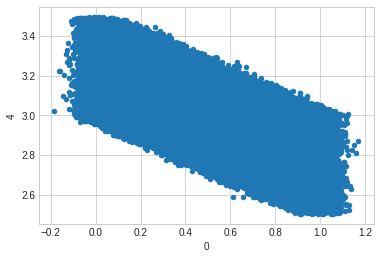

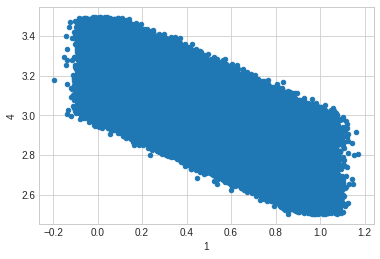

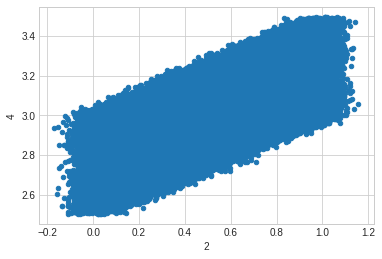

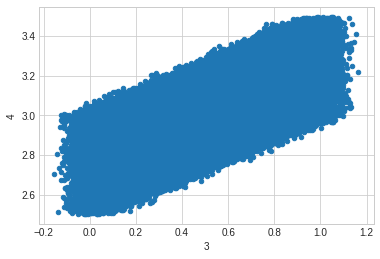

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-whitegrid')
import numpy as np

df=pd.read_csv("../example_data/duplicateVarsWithNoise100k.txt",sep=" ",header=None)
df.plot.scatter(x=0, y=4)
df.plot.scatter(x=1, y=4)
df.plot.scatter(x=2, y=4)
df.plot.scatter(x=3, y=4)

In [ ]:
from S_run_aifeynman import run_aifeynman
run_aifeynman("/content/AI-Feynman/example_data/","duplicateVarsWithNoise100k.txt",30,"14ops.txt", polyfit_deg=3, NN_epochs=600)

Checking for brute force + 

Checking for brute force * 

Checking polyfit 

Complexity  RMSE  Expression
[14.298543993057573, 31.581628067077556, -2.01507231217991e-10]
[33.65148445440323, 23.756310705463807, '-0.25*x0 - 0.25*x1 + 0.25*x2 + 0.25*x3 + 3']
Checking for brute force + 

Checking for brute force * 

Checking polyfit 

Complexity  RMSE  Expression
[14.298543993057573, 31.581628067077556, -2.01507231217991e-10]
[33.65148445440323, 23.756310705463807, '-0.25*x0 - 0.25*x1 + 0.25*x2 + 0.25*x3 + 3']
[46.8263695199547, 23.52960359812308, 1.24779089858445]
[46.82645046311327, 23.52838791838819, 1.24786090850830]
[95.73080411689963, 23.327546464035166, tan(0.0291788969188929*x2 + 0.88010545566829)]
[96.45077266713301, 23.245315586041865, tan(0.0187515188008547*x2 - 2.25579309421493)]
[114.00400153885663, 23.118715196684242, tan(x3*exp(-2.8512812870763*exp(x1)) + 0.886947154998779)]
[142.49654530491821, 23.079708409481626, tan(-0.00579398358240724*x0 + 0.0330431312322617*x3 + 0.8805

In [ ]:
!cat /content/AI-Feynman/Code/results/solution_duplicateVarsWithNoise100k.txt

31.581628066937117 4.828752001138368 482875.20011383685 0.0 28.41837193711479 8.91505505199440e-11
26.839728820466323 4.746298189996813 474629.81899968133 2.0 26.839728820466323 3
23.756310705463807 4.570238901556437 457023.89015564375 9.754887502163468 23.75631070546381 3.0 - 0.25*((x0+x1)-(x2+x3))
23.756310705463807 4.570238901556437 457023.89015564375 26.509775004326936 23.756310705463807 -0.25*(x0+x1) + 0.25*x2 + 0.25*x3 + 3
23.745005671666114 4.569552195681785 456955.2195681785 34.98176767829577 23.745005671666124 log(0.6*((x0+x1)-(x2+x3))**2 - 5*((x0+x1)-(x2+x3)) + 20.1)
31.410443124425957 4.565473102549251 456547.31025492505 44.92493580414848 23.677963582431364 0.334005201613170
30.79927262051402 4.5564051106540235 455640.51106540236 46.8263695199547 23.52960359812308 1.24779089858445
30.799214170258804 4.556330570493311 455633.05704933114 46.82645046311327 23.52838791838819 1.24786090850830
31.408971447832 4.380975198580926 438097.5198580926 90.99992632646352 20.8355488454032 0

In [ ]:
!cp -r /content/AI-Feynman /content/gdrive/My\ Drive/Lemay.ai_research/

In [ ]:
# from S_run_aifeynman import run_aifeynman
# run_aifeynman("/content/gdrive/My Drive/Lemay.ai_research/AI-Feynman/example_data/","duplicateVarsWithNoise.txt",30,"19ops.txt", polyfit_deg=3, NN_epochs=1000)

In [ ]:
import os
import random
import numpy as np
os.chdir("/content/gdrive/My Drive/Lemay.ai_research/AI-Feynman/example_data")

def getY(x01,x23):
  y = -0.5*x01+0.5*x23+3
  return y

def getRow():
  x=[0 for x in range(4)]
  x[1]=random.random()
  x[3]=random.random()
  y=getY(x[1],x[3])
  mu=0
  sigma=0.05
  noise=np.random.normal(mu, sigma, 4)
  x=x+noise
  return str(x[1])+" "+str(x[3])+" "+str(y)+"\n"

with open("varsWithNoise.txt", "w") as f:
  for _ in range(100000):
    f.write(getRow())
f.close()

# switch back to the code directory
os.chdir("/content/gdrive/My Drive/Lemay.ai_research/AI-Feynman/Code")

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-whitegrid')
import numpy as np

df=pd.read_csv("../example_data/varsWithNoise.txt",sep=" ",header=None)
df.plot.scatter(x=0, y=2)
df.plot.scatter(x=1, y=2)

In [ ]:
from S_run_aifeynman import run_aifeynman
run_aifeynman("/content/gdrive/My Drive/Lemay.ai_research/AI-Feynman/example_data/","varsWithNoise.txt",30,"14ops.txt", polyfit_deg=3, NN_epochs=1000)